# Quick start example

PowNet provides the Simulator class to simplify the process of analyzing how electricity is generated and flows through the network. In this example, we will simulate the day-ahead scheduling (24-hours) over two days. The system has three thermal units, one import node, and one hydropower unit. Data files for this case study, called "dummy", can be found [here](https://github.com/Critical-Infrastructure-Systems-Lab/PowNet/tree/master/model_library). Please download them to a folder on your local machine. There are four substations with demand. Generators are treated as their own nodes. The dummy system is depicted below.

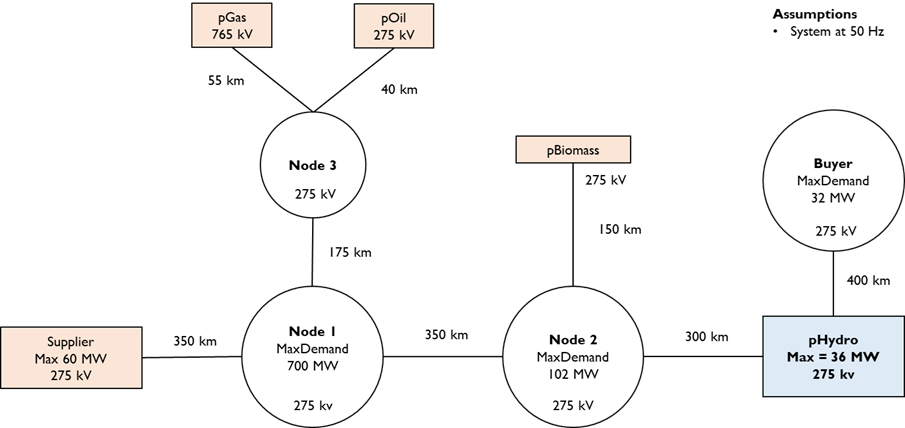

In [1]:
import os
from IPython.display import Image, display
from pownet.folder_utils import get_pownet_dir

project_root = get_pownet_dir()
image_path = os.path.join(project_root, "images", "dummy_system.png")
display(Image(filename=image_path))

To begin, we need to tell PowNet where the input data for the power system model is located using input_folder. If we want to save the simulation results, we also need to specify the output_folder. We then define key simulation parameters:

- sim_horizon: The duration of each simulation run (e.g., 24 hours).
- steps_to_run: The number of times the simulation will be executed sequentially (e.g., simulating multiple days).
- solver: The mathematical engine used to solve the optimization problem (defaults to Gurobi). However, PowNet also supports Highs, which is an open-source solver.

In [2]:
from pownet.core import Simulator


# Specify folder directories relative to your current working directory. 
# You will need to change these paths to match your local setup if you install the package via pip.
input_folder = os.path.join(project_root, "model_library")
output_folder = os.path.join(project_root, "outputs")

# Define the name of the model and the year
model_name = "dummy"
model_year = 2016

# Simulation parameters
sim_horizon = 24
steps_to_run = 2  # 2 Simulation days or 48 hours
solver = "highs"  # or gurobi

Now, we initialize the Simulator class and run the simulation.

In [3]:
simulator = Simulator(
    input_folder=input_folder,
    model_name=model_name,
    model_year=model_year,
)

simulator.run(
    sim_horizon=sim_horizon,
    steps_to_run=steps_to_run,
    solver=solver,
)




PowNet Input Data Summary:
        Timestamp                 = 20250513_1520
        Model name                = dummy
        Year                      = 2016
        ---- System characteristics ----
        No. of nodes              = 9
        No. of edges              = 8
        No. of thermal units      = 3
        No. of demand nodes       = 3
        Peak demand               = 818 MW

        ---- Renewable capacities ----
        Hydropower units          = 1
        Daily hydropower units    = 0
        Solar units               = 0
        Wind units                = 0
        Import units              = 1

        ---- Energy storage ----
        No. of hydropower with ESS = 0
        No. of daily hydropower with ESS = 0
        No. of Solar with ESS     = 0
        No. of Wind with ESS      = 0
        No. of Thermal units with ESS = 0
        No. of Grid ESS           = 0

        ---- Modeling parameters ----
        Simulation horizon        = 24 hours
        Numbe

Set parameter Username
Set parameter LicenseID to value 2593676
Academic license - for non-commercial use only - expires 2025-12-01


The simulation produces several key outputs:
- Node variables: Quantities associated with specific points in the network (generators and substations)
- Flow variables: Energy flow in transmission lines
- System-wide variables: Overall system metrics (e.g., spinning-reserve shortfall)

In [4]:
# Write the simulation results
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
simulator.write_results(output_folder)

We can also perform data analysis directly on these model outputs, which are in the form of dataframes.

In [5]:
node_variables = simulator.get_node_variables()
print(node_variables.head())

        value   vartype  node  hour
0   10.000000  pthermal  pGas     1
1  254.493369  pthermal  pGas     2
2  479.893719  pthermal  pGas     3
3  469.318029  pthermal  pGas     4
4  467.055856  pthermal  pGas     5


PowNet provides tools to visualize the simulation results. For example, we can use plot_fuelmix() to see the contribution of different energy sources (coal, gas, solar, etc.) to the total electricity generation over time.

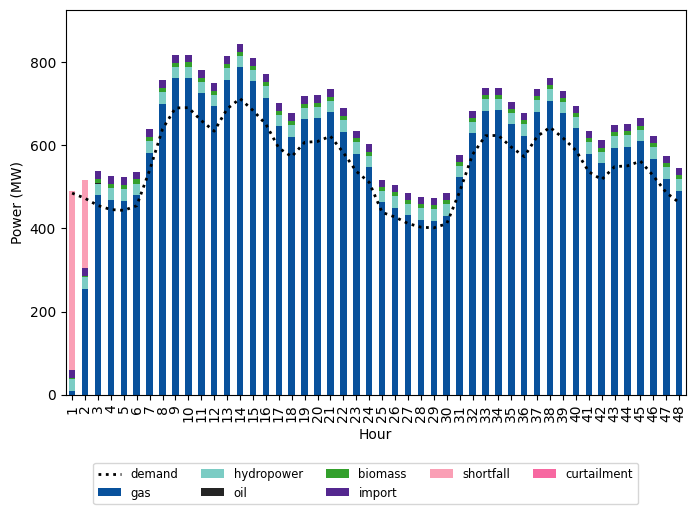

In [6]:
simulator.plot_fuelmix("bar", output_folder)

The plot_thermal_units() function allows us to visualize the operational status (on/off) and power output of individual thermal power plants throughout the simulation. In the dummy system, there are three thermal units, namely pGas, pOil, and pBiomass.

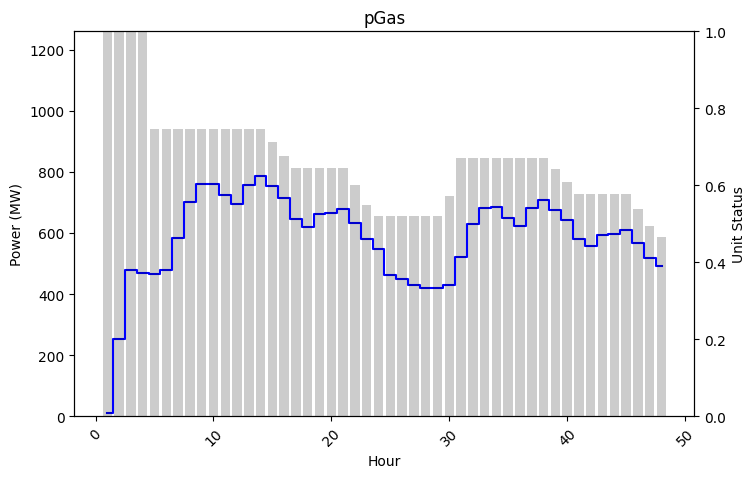

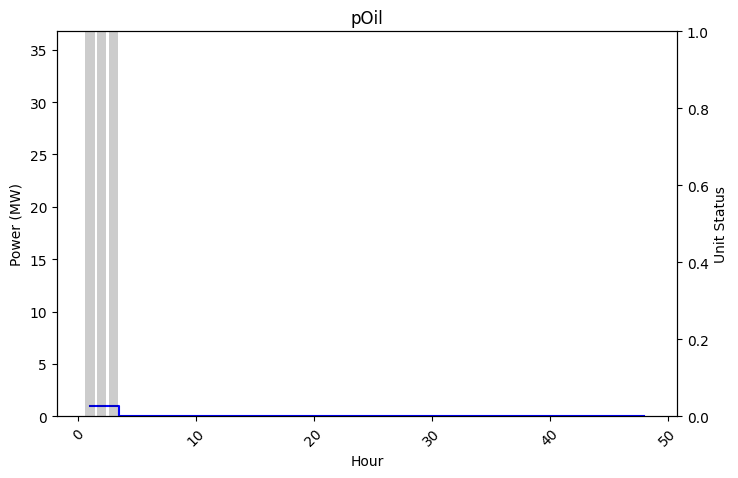

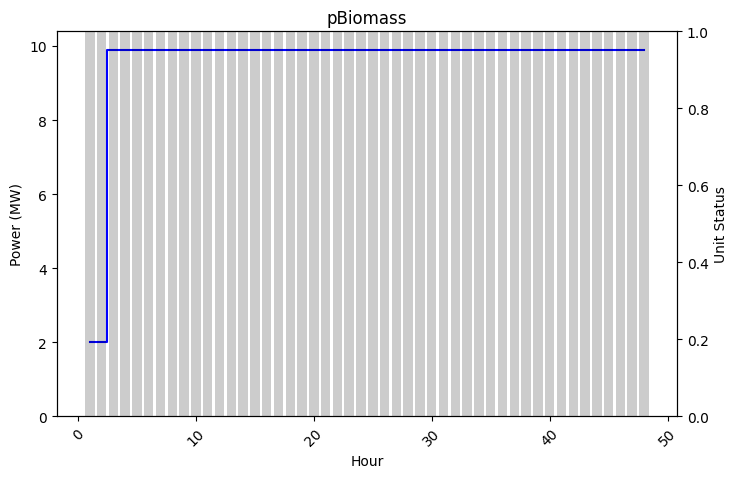

In [7]:
simulator.plot_thermal_units(output_folder)